# Regresion Lineal con python


Primero leemos los datos
```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Advertising.csv')
df.head()
```



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/Users/jorgeiv500/Dropbox/Mac/Documents/AAD/SEMANA1_CLASE_R/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Ahora llamamos la libreria **statmodels**, basada en r
```python
import statsmodels.formula.api as smf
lm=smf.ols(formula="Sales~TV",data=df).fit()
```

In [5]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="Sales~TV",data=df).fit()


Mediante el comando **params** tenemos el resulltado de $\beta$ y $\beta_{0}$
y mediante el comando **summary** tenemos los resultados del modelo
```python
lm.params
lm.summary
```



In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        09:57:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo lineal predictivo sería Sales = 7.032594 + 0.047537 * TV

# Pronostico y medida de error



```python
ventas_fut=lm.predict(pd.DataFrame(df['TV']))
ventas_fut


import matplotlib.pyplot as plt

df.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pd.DataFrame(df["TV"]),ventas_fut,c="red",linewidth=2)
```

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1



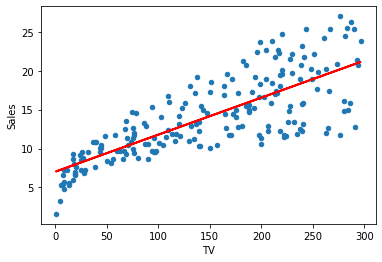

In [13]:
ventas_fut=lm.predict(pd.DataFrame(df['TV']))
ventas_fut
import matplotlib.pyplot as plt

df.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pd.DataFrame(df["TV"]),ventas_fut,c="red",linewidth=2)

In [14]:
df["sales_pred"] = ventas_fut
df.head()

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [15]:
df["RSE"] = (df["Sales"]-df["sales_pred"])**2
df

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970775,17.050503
1,44.5,39.3,45.1,10.4,9.147974,1.567569
2,17.2,45.9,69.3,9.3,7.850224,2.101851
3,151.5,41.3,58.5,18.5,14.234395,18.195390
4,180.8,10.8,58.4,12.9,15.627218,7.437719
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848493,1.558735
196,94.2,4.9,8.1,9.7,11.510545,3.278073
197,177.0,9.3,6.4,12.8,15.446579,7.004380
198,283.6,42.0,66.2,25.5,20.513985,24.860348


# 

In [16]:
SSD = sum(df["RSE"])
SSD

2102.5305831313503

In [17]:
RSE = np.sqrt(SSD/(len(df)-2))
RSE

3.258656368650462

In [18]:
error=RSE/np.mean(df['Sales'])
error

0.23238768897489476

In [19]:
lm.rsquared

0.611875050850071

# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal 


```python
from sklearn.feature_selection import RFE # eliminacion de rasgos recursiva
from sklearn.svm import SVR
import pandas as pd
import numpy as np

data = pd.read_csv('conjunto')
#Aca cambia con statmodels, se agregan las variables en un conjunto con sus nombres

feature_cols = ["var1", "var2", "var3"]

X = data[feature_cols]
Y = data["Sales"]

estimator=SVR(kernel="linear")
RFE(estimator,n_features_to_select=2,step=1) #quiero 2 variables en un paso
selector=selector.fit(X,Y)
selector.support_ #cuales debo escoger
selector.ranking_# ranking de importancia

from sklearn.linear_model import LinearRegression
X_pred = X[["Var1", "var2"]]
lm = LinearRegression()
lm.fit(X_pred, Y)
lm.intercept_
lm.coef_ #
lm.score(X_pred, Y) #rcuadrado



from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_pred,Y)

print(clf.coef_)

print(clf.intercept_)
```





In [34]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np


data = pd.read_csv('/Users/jorgeiv500/Dropbox/Mac/Documents/AAD/SEMANA1_CLASE_R/Advertising.csv')
#Aca cambia con statmodels, se agregan las variables en un conjunto con sus nombres
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
feature_cols = ["TV", "Radio", "Newspaper"]
feature_cols
X = data[feature_cols]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
from sklearn.feature_selection import RFE # eliminacion de rasgos recursiva
from sklearn.svm import SVR
import pandas as pd
import numpy as np


X = data[feature_cols]
Y = data["Sales"]

estimator=SVR(kernel="linear")
selector=RFE(estimator,n_features_to_select=2,step=1) #quiero 2 variables en un paso
selector=selector.fit(X,Y)
selector.support_ #cuales debo escoger
selector.ranking_# ranking de importancia

array([1, 1, 2])

In [42]:
estimator=SVR(kernel="linear")
selector=RFE(estimator,n_features_to_select=2,step=1) #quiero 2 variables en un paso
selector=selector.fit(X,Y)
selector.support_ #cuales debo escoger
selector.ranking_# ranking de importancia

array([1, 1, 2])

In [43]:
from sklearn.linear_model import LinearRegression
X_pred = X[["TV","Radio"]]
lm = LinearRegression()
lm.fit(X_pred, Y)
lm.intercept_
lm.coef_
lm.score(X_pred, Y)

0.8971942610828957

In [44]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_pred,Y)

print(clf.coef_)

print(clf.intercept_)

[0.04574549 0.18754124]
2.9330094583319486
